<a href="https://colab.research.google.com/github/n9hquan/QR103/blob/main/Homework_2.3_3D_plotting_Nguyen_Chinh_Quan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
import io
import scipy.stats as st

In [2]:
uploaded = files.upload()
wealth89_19 = pd.read_excel(io.BytesIO(uploaded["wealthSCF.xlsx"]))

Saving wealthSCF.xlsx to wealthSCF.xlsx


In [3]:
list_of_years = [1989, 1992, 1995, 1998, 2001, 2004, 2007, 2010, 2013, 2016, 2019]

### **CASE 1**

lower whisker = q1 - (1.5 * (q3-q1))

upper whisker = q3 + (2.5 * (q3-q1))


In [14]:
list_of_min_wealth_densities_c1 = []
list_of_max_wealth_densities_c1 = []
list_of_upper_whiskers_c1 = []
list_of_lower_whiskers_c1 = []
list_of_q1_c1 = []
list_of_q3_c1 = []

In [17]:
for i in range(len(list_of_years)):
  wealth_year_c1 = wealth89_19[list_of_years[i]].dropna()/100000
  list_of_q1_c1.append(wealth_year_c1.quantile(0.25))
  list_of_q3_c1.append(wealth_year_c1.quantile(0.75))
  list_of_lower_whiskers_c1.append((list_of_q1_c1[i] - (1.5 * (list_of_q3_c1[i] - list_of_q1_c1[i]))))
  list_of_upper_whiskers_c1.append((list_of_q3_c1[i] + (2.5 * (list_of_q3_c1[i] - list_of_q1_c1[i]))))
  wealth_year_clean_c1 = wealth_year_c1[(wealth_year_c1 >= list_of_lower_whiskers_c1[i]) & (wealth_year_c1 <= list_of_upper_whiskers_c1[i])] #clear outliers
  list_of_min_wealth_densities_c1.append(wealth_year_clean_c1.min())
  list_of_max_wealth_densities_c1.append(wealth_year_clean_c1.max())
minwealth_c1 = np.min(list_of_min_wealth_densities_c1)
maxwealth_c1 = np.max(list_of_max_wealth_densities_c1)
supportWealth_c1 = np.linspace(minwealth_c1,maxwealth_c1, 500)
minwealth_c1, maxwealth_c1

(-21.00875727, 67.098997326)

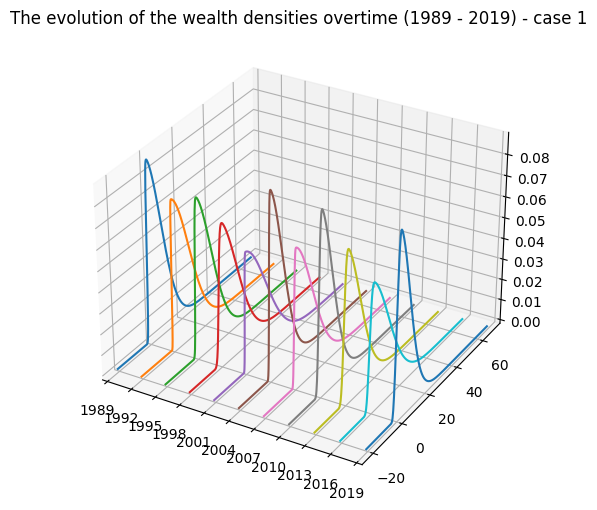

In [18]:
fig = plt.figure(figsize=(10,6))
dens = fig.add_subplot(projection='3d')
dens.set_title("The evolution of the wealth densities overtime (1989 - 2019) - case 1")
dens.set_xlim(1989,2019)
dens.set_xticks(list_of_years)
for i in range(len(list_of_years)):
  wealth_year_c1 = wealth89_19[list_of_years[i]].dropna()/100000
  list_of_q1_c1.append(wealth_year_c1.quantile(0.25))
  list_of_q3_c1.append(wealth_year_c1.quantile(0.75))
  list_of_lower_whiskers_c1.append((list_of_q1_c1[i] - (1.5 * (list_of_q3_c1[i] - list_of_q1_c1[i]))))
  list_of_upper_whiskers_c1.append((list_of_q3_c1[i] + (2.5 * (list_of_q3_c1[i] - list_of_q1_c1[i]))))
  wealth_year_clean_c1 = wealth_year_c1[(wealth_year_c1 >= list_of_lower_whiskers_c1[i]) & (wealth_year_c1 <= list_of_upper_whiskers_c1[i])]
  a, loc, scale = st.skewnorm.fit(wealth_year_clean_c1)
  pdf = st.skewnorm.pdf(supportWealth_c1, a, loc, scale)
  time=np.ones(len(supportWealth_c1))*list_of_years[i]
  dens.plot(time,supportWealth_c1,pdf)


### **CASE 2**

lower whisker = q1 - (2 * (q3-q1))

upper whisker = q3 + (3.5 * (q3-q1))


In [15]:
list_of_min_wealth_densities_c2 = []
list_of_max_wealth_densities_c2 = []
list_of_upper_whiskers_c2 = []
list_of_lower_whiskers_c2 = []
list_of_q1_c2 = []
list_of_q3_c2 = []

In [13]:
for i in range(len(list_of_years)):
  wealth_year_c2 = wealth89_19[list_of_years[i]].dropna()/100000
  list_of_q1_c2.append(wealth_year_c2.quantile(0.25))
  list_of_q3_c2.append(wealth_year_c2.quantile(0.75))
  list_of_lower_whiskers_c2.append((list_of_q1_c2[i] - (2 * (list_of_q3_c2[i] - list_of_q1_c2[i]))))
  list_of_upper_whiskers_c2.append((list_of_q3_c2[i] + (3.5 * (list_of_q3_c2[i] - list_of_q1_c2[i]))))
  wealth_year_clean_c2 = wealth_year_c2[(wealth_year_c2 >= list_of_lower_whiskers_c2[i]) & (wealth_year_c2 <= list_of_upper_whiskers_c2[i])] #clear outliers
  list_of_min_wealth_densities_c2.append(wealth_year_clean_c2.min())
  list_of_max_wealth_densities_c2.append(wealth_year_clean_c2.max())
minwealth_c2 = np.min(list_of_min_wealth_densities_c2)
maxwealth_c2 = np.max(list_of_max_wealth_densities_c2)
supportWealth_c2 = np.linspace(minwealth_c2,maxwealth_c2, 500)

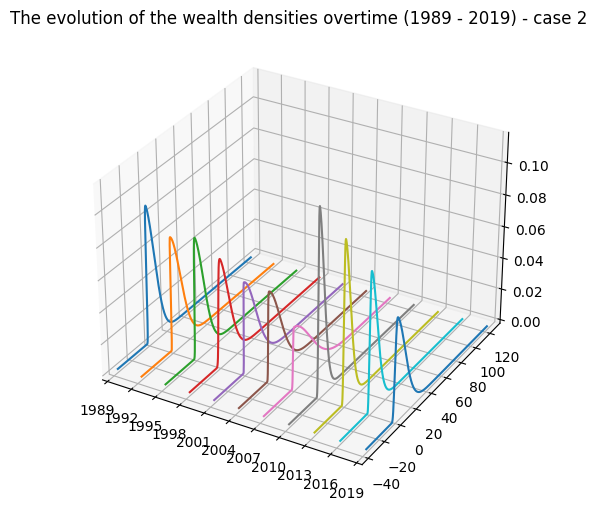

In [20]:
fig = plt.figure(figsize=(10,6))
dens = fig.add_subplot(projection='3d')
dens.set_title("The evolution of the wealth densities overtime (1989 - 2019) - case 2")
dens.set_xlim(1989,2019)
dens.set_xticks(list_of_years)
for i in range(len(list_of_years)):
  wealth_year_c2 = wealth89_19[list_of_years[i]].dropna()/100000
  list_of_q1_c2.append(wealth_year_c2.quantile(0.25))
  list_of_q3_c2.append(wealth_year_c2.quantile(0.75))
  list_of_lower_whiskers_c2.append((list_of_q1_c2[i] - (1.5 * (list_of_q3_c2[i] - list_of_q1_c2[i]))))
  list_of_upper_whiskers_c2.append((list_of_q3_c2[i] + (2.5 * (list_of_q3_c2[i] - list_of_q1_c2[i]))))
  wealth_year_clean_c2 = wealth_year_c2[(wealth_year_c2 >= list_of_lower_whiskers_c2[i]) & (wealth_year_c2 <= list_of_upper_whiskers_c2[i])]
  a, loc, scale = st.skewnorm.fit(wealth_year_clean_c2)
  pdf = st.skewnorm.pdf(supportWealth_c2, a, loc, scale)
  time=np.ones(len(supportWealth_c2))*list_of_years[i]
  dens.plot(time,supportWealth_c2,pdf)

In [ ]:
minwealth_c2_b = min(list_of_min_wealth_densities_c2[0], list_of_min_wealth_densities_c2[-1])
maxwealth_c2_b = max(list_of_max_wealth_densities_c2[0], list_of_max_wealth_densities_c2[-1])
supportWealth_c2_b = np.linspace(minwealth_c2_b,maxwealth_c2_b, 500)

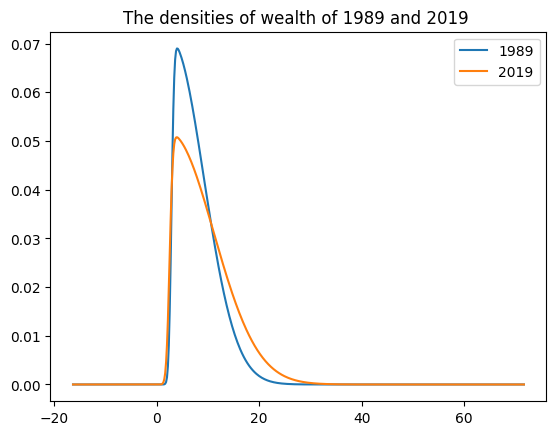

In [ ]:
for i in range(len(list_of_years)):
  if i==0 or i == len(list_of_years) - 1:
    wealth_year_c2 = wealth89_19[list_of_years[i]].dropna()/100000
    list_of_q1_c2.append(wealth_year_c2.quantile(0.25))
    list_of_q3_c2.append(wealth_year_c2.quantile(0.75))
    list_of_lower_whiskers_c2.append((list_of_q1_c2[i] - (1.5 * (list_of_q3_c2[i] - list_of_q1_c2[i]))))
    list_of_upper_whiskers_c2.append((list_of_q3_c2[i] + (2.5 * (list_of_q3_c2[i] - list_of_q1_c2[i]))))
    wealth_year_clean_c2 = wealth_year_c2[(wealth_year_c2 >= list_of_lower_whiskers_c2[i]) & (wealth_year_c2 <= list_of_upper_whiskers_c2[i])]
    a, loc, scale = st.skewnorm.fit(wealth_year_clean_c2)
    pdf = st.skewnorm.pdf(supportWealth_c2, a, loc, scale)
    if i==0: 
      plt.title("The densities of wealth of 1989 and 2019 ")
      plt.plot(supportWealth_c2_b, pdf, label = "1989")
      plt.legend()
    else: 
      plt.plot(supportWealth_c2_b, pdf, label = "2019")
      plt.legend()